# Linear Regression
### Using a simple relation to get the equation 
#### `y=a+bx`

In [42]:
#import libraries
import numpy as np
import pandas as pd 

In [43]:
data = pd.read_csv("/home/abhinay/python/test/data/study_hours_vs_score.csv")
data.head()

,Hours_Studied,Exam_Score
0,1.1,21
1,1.5,30
2,2.0,34
3,2.3,39
4,2.7,41


In [86]:
X=data["Hours_Studied"]
y=data["Exam_Score"]

#### b=(Summation XY)/(Summation XX)
where summation xy = summation xy - (1/n)*summation x * summation y and summation xx = summation x**2 - ((summation x)**2)/n 

In [62]:
#count(n)
n=len(X)

#summation X
sumX=np.sum(X)

#summation Y
sumY=np.sum(y)

#X^2
sumXX=np.sum(X**2)

#summation XY
sumXY=np.sum(X*y)

For summation XX

In [76]:
Sxx=sumXX-(sumX**2/n)
Sxy=sumXY-(sumX*sumY)/n

In [77]:
b=Sxy/Sxx
a=np.mean(y)-b*np.mean(X)

In [78]:
print(f"Equation of line: y = {a:.2f} + {b:.2f}x")

Equation of line: y = 17.72 + 8.66x


In [79]:
yPred=a+b*X

In [83]:
y.head(), yPred.head()

(0    21
 1    30
 2    34
 3    39
 4    41
 Name: Exam_Score, dtype: int64,
 0    27.240038
 1    30.702444
 2    35.030452
 3    37.627257
 4    41.089663
 Name: Hours_Studied, dtype: float64)

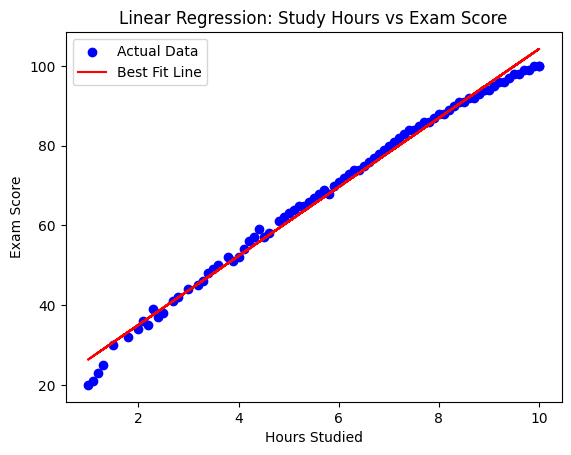

In [84]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, yPred, color="red", label="Best Fit Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Study Hours vs Exam Score")
plt.legend()
plt.show()

In [87]:
# R-squared (coefficient of determination)
ss_res = np.sum((y - yPred)**2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r_squared = 1 - (ss_res/ss_tot)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9920


In [88]:
# Mean Squared Error (MSE)
mse = np.mean((y - yPred)**2)
print(f"MSE: {mse:.2f}")

MSE: 4.06


In [89]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 2.02


In [90]:
# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y - yPred))
print(f"MAE: {mae:.2f}")

MAE: 1.58


In [92]:
def predict_score(hours):
    """Predict exam score based on hours studied"""
    return a + b * hours

# Example predictions
print(f"\nPredictions:")
print(f"Study 3 hours → Score: {predict_score(3):.2f}")
print(f"Study 7 hours → Score: {predict_score(7):.2f}")


Predictions:
Study 3 hours → Score: 43.69
Study 7 hours → Score: 78.31


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape for sklearn
X_reshaped = X.values.reshape(-1, 1)

# Fit model
model = LinearRegression()
model.fit(X_reshaped, y)

print(f"\nSklearn comparison:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"R-squared: {r2_score(y, model.predict(X_reshaped)):.4f}")


Sklearn comparison:
Intercept: 17.72
Slope: 8.66
R-squared: 0.9920
